In [ ]:
%matplotlib inline
from IPython.display import HTML,Image,SVG,YouTubeVideo

# Border-based segmentation

Border detection can be achieved by various filters, for example by convolution with linear filters or by non linear filters such as the morphological gradient. The results of these filters is an image where pixels located near abrupt gray level changes have a high intensity whereas pixels located in more contiuous regions share a low value. In the example below displays the result of a Sobel filter on an image with clearly identifiable objects. In order to separate the objects, very sharp borders could only be considerd, for example with a threshold $sobel>50$. By looking carefully to the obtained borders, depending on the threshold level choosen, some borders may be seen as disconnected.

In [1]:
def norm_hist(ima):
    hist,bins = np.histogram(ima.flatten(),range(256))  # histogram is computed on a 1D distribution --> flatten()
    return 1.*hist/np.sum(hist) # normalized histogram

def display_hist(ima):
    plt.figure(figsize=[10,5])
    if ima.ndim == 2:
        nh = norm_hist(ima)
    else:
        nh_r = norm_hist(ima[:,:,0])
        nh_g = norm_hist(ima[:,:,1])
        nh_b = norm_hist(ima[:,:,2])
    # display the results
    plt.subplot(1,2,1)
    plt.imshow(ima,cmap=plt.cm.gray)
    plt.subplot(1,2,2)
    if ima.ndim == 2:
        plt.plot(nh,label='hist.')
    else:
        plt.plot(nh_r,color='r',label='r')
        plt.plot(nh_g,color='g',label='g')
        plt.plot(nh_b,color='b',label='b')
    plt.legend()
    plt.xlabel('gray level');

C:\Program Files\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,
C:\Users\HP\AppData\Local\Temp\ipykernel_20140\97135644.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  im = coins().astype(np.float)


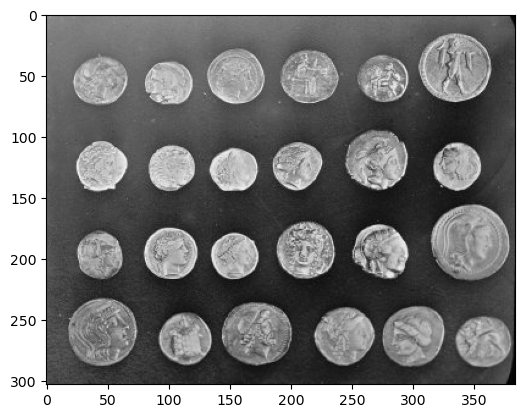

In [2]:
from skimage.data import camera,coins
from skimage.filters import sobel
import matplotlib.pyplot as plt
import numpy as np

im = coins().astype(np.float)
plt.imshow(im,cmap=plt.cm.gray);

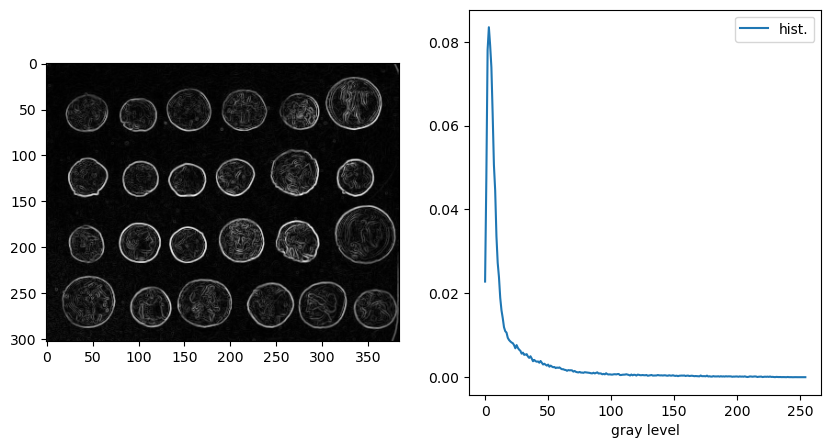

In [3]:
fsobel = sobel(im) 
norm = 255*fsobel/np.max(fsobel)

display_hist(norm)

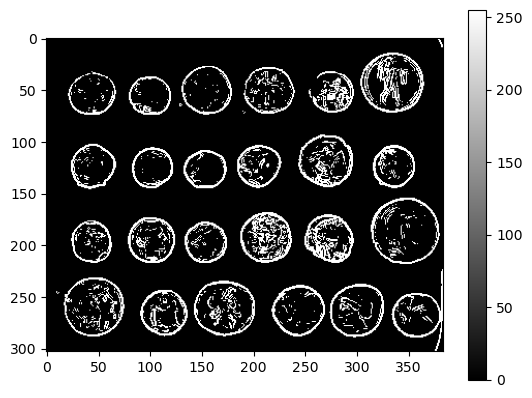

In [7]:
borders = 255*(norm>50)
plt.imshow(borders,cmap=plt.cm.gray);
plt.colorbar()

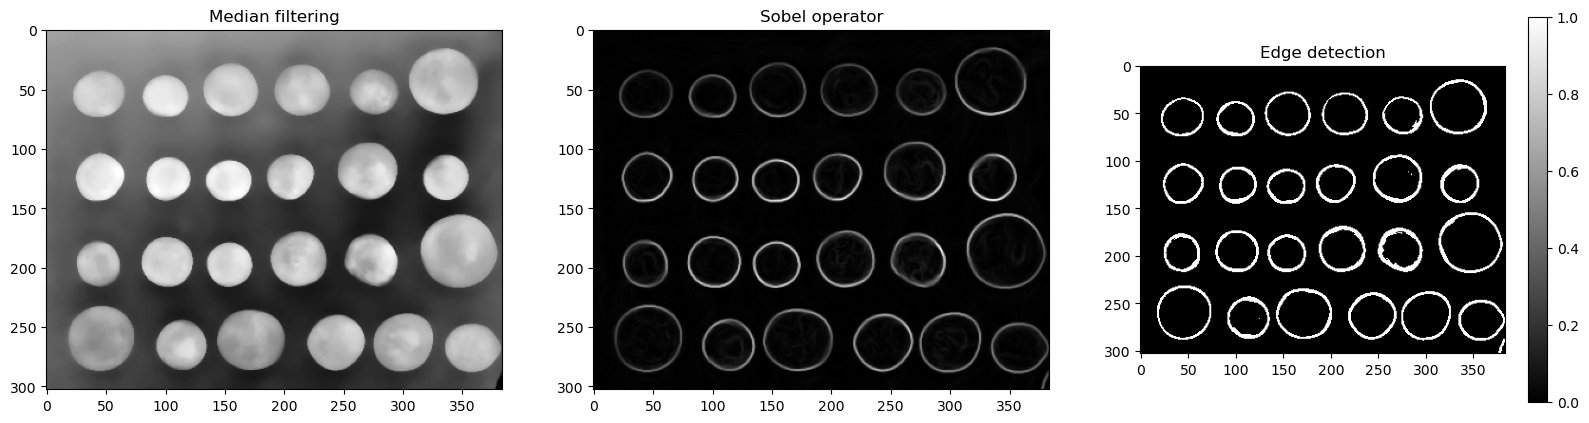

In [26]:
import skimage.filters.rank as skr
from skimage.morphology import disk

fim = skr.median(im.astype(np.uint8),disk(7))
fsobel = sobel(fim) 
norm = 255*fsobel/np.max(fsobel)
fig = plt.figure(figsize=[20,5])
ax1 = fig.add_subplot(131)
plt.imshow(fim, cmap=plt.cm.gray)
plt.title("Median filtering")
ax2 = fig.add_subplot(132)
plt.imshow(fsobel, cmap=plt.cm.gray)
plt.title("Sobel operator")
ax3 = fig.add_subplot(133)
plt.imshow(norm>30,cmap=plt.cm.gray);
plt.title("Edge detection")
plt.colorbar()

looking carefully to the obtained borders, we see that, depending on the threshold level choosen, some borders may be disconnected.

Questions:
* do you know a better edge detection that maybe help to solve this problem ?